In [1]:
#Importing libraries 
import pandas_datareader as pdd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [2]:
#Extracting data from yahoo finance using pdd.DataReader functions 
data_frame = pdd.DataReader('TSLA', data_source='yahoo', start='2012-01-01',end='2021-12-10')

<function matplotlib.pyplot.show(close=None, block=None)>

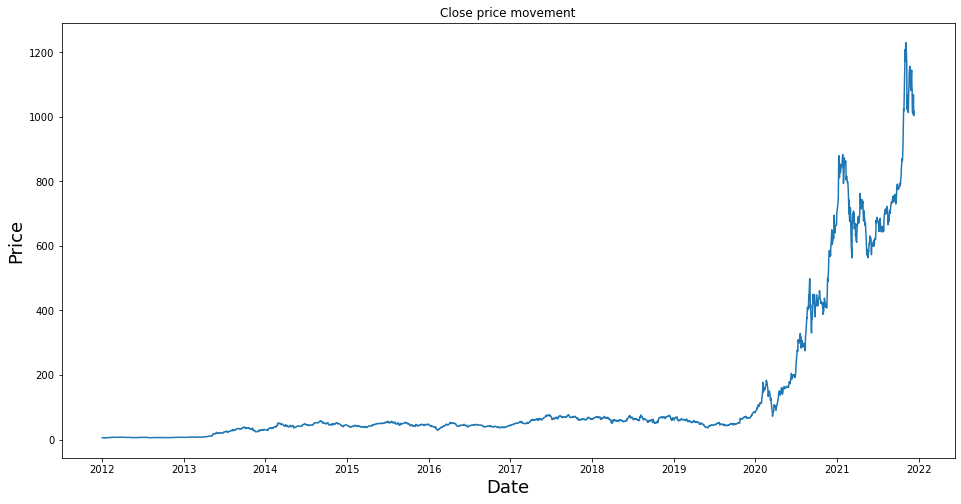

In [3]:
#Ploting the close price movement
plt.figure(figsize=(16,8))
plt.title('Close price movement')
plt.plot(data_frame['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show

In [4]:
#Filtering the columns 
filter_data = data_frame.filter(['Close'])
dataset = filter_data.values
len(dataset)

2503

In [5]:
#spliting dataset for training which is 70 percent.
import math
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

1753

In [6]:
#scaleing dataset and storing in the form of array
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[8.63425414e-04],
       [8.03034313e-04],
       [7.06735432e-04],
       ...,
       [8.68649932e-01],
       [8.15473399e-01],
       [8.26270330e-01]])

In [7]:
#Training dataset setting the iteration 60
train_data = scaled_data[0:training_data_size,:]
x_train = []
y_train = []
for i in range(50,len(train_data)):
    x_train.append(train_data[i-50:i,0])
    y_train.append(train_data[i,0])
    if i <=51:
        print(x_train)
        print(y_train)
        

[array([0.00086343, 0.00080303, 0.00070674, 0.00067246, 0.00072795,
       0.00078834, 0.00088791, 0.00089117, 0.        , 0.00062186,
       0.00065614, 0.00064798, 0.00062186, 0.00064961, 0.0007557 ,
       0.00084547, 0.00100379, 0.00106745, 0.00110662, 0.00102501,
       0.00110825, 0.00121761, 0.00136451, 0.0014706 , 0.00143795,
       0.00149182, 0.00159791, 0.00135634, 0.00142   , 0.00169421,
       0.00176439, 0.00185906, 0.001988  , 0.00191129, 0.00186559,
       0.00191618, 0.00178887, 0.00176766, 0.00179867, 0.00173338,
       0.0018966 , 0.00183621, 0.00179214, 0.00168441, 0.00168605,
       0.00167788, 0.00195046, 0.00215775, 0.0021708 , 0.00204023])]
[0.0019928966079299933]
[array([0.00086343, 0.00080303, 0.00070674, 0.00067246, 0.00072795,
       0.00078834, 0.00088791, 0.00089117, 0.        , 0.00062186,
       0.00065614, 0.00064798, 0.00062186, 0.00064961, 0.0007557 ,
       0.00084547, 0.00100379, 0.00106745, 0.00110662, 0.00102501,
       0.00110825, 0.00121761, 0.0

In [8]:
import numpy as np
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1703, 50, 1)

In [9]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [10]:
model.compile(optimizer='adam', loss= "mean_squared_error")

In [11]:
#Fitting dataset into the model
model.fit(x_train, y_train,batch_size=1,epochs=1 )

1703/1703 [==============================] - 52s 27ms/step - loss: 2.0675e-05


In [12]:
test_data = scaled_data[training_data_size -60: ,:]
x_test = []
y_test = dataset[training_data_size:,:]
for i in range(50, len(test_data)):
    x_test.append(test_data[i-50:i,0])

In [13]:
x_test = np.array(x_test)

In [14]:
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [15]:
#Predicting  using the model.
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [18]:
#calculating rmse value using r**2 
rmse = np.sqrt(np.mean(predictions -y_test)**2)
rmse

ValueError: operands could not be broadcast together with shapes (760,1) (750,1) 

In [20]:
#Ploting the actual value, predicted value,train value.
train = data[:training_data_size]
valid = data[training_data_size:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model LM')
plt.xlabel ('Date', fontsize=18)
plt.ylabel ('close price in $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','predictions'],loc='lower right')
plt.show

NameError: name 'data' is not defined

In [300]:
valid

,Close,predictions
Date,,
2019-04-10,55.212002,58.035999
2019-04-11,53.683998,57.883213
2019-04-12,53.540001,57.638752
2019-04-15,53.276001,57.356529
2019-04-16,54.672001,57.058578
...,...,...
2021-12-06,1009.010010,934.104065
2021-12-07,1051.750000,922.622620
2021-12-08,1068.959961,914.419312


In [302]:
from sklearn.metrics import accuracy_score 